# Dashboard Monitoring and Ecommerce Analysis

Pertanyaan:
Bagaimana kondisi penjualan dari perusahaan?

1. Bagaimana kondisi penjualan dari perusahaan?
2. Bagaimana distribusi pelanggan yang membeli produk perusahaan?
3. Bagaimana kondisi ketersediaan produk di gudang? Apakah masih terpenuh aman atau harus segera dilakukan pengisian ulang?
4. Bagaimana cara meningkatkan penjualan dari perusahaan?
5. Produk mana yang mendapatkan performa penjualan terbaik dan yang kurang baik?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menyiapkan Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import networkx as nx

Membaca Dataset yang dibutuhkan


In [ ]:
#membaca data user
data_user = pd.read_csv('/content/drive/MyDrive/Tes Junior Data Analyst Scientist 2023/datauser2023.csv')
data_user.head()

,User_ID,Age,Status
0,#1,32,premium
1,#2,36,premium
2,#3,39,premium
3,#4,30,premium
4,#5,33,basic


In [ ]:
#membaca data produksi
data_produksi = pd.read_csv('/content/drive/MyDrive/Tes Junior Data Analyst Scientist 2023/dataproduk2023.csv')
data_produksi.head()

,PRODUCT_ID,JUMLAH_DIGUDANG,HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA,HARGA_SATUAN
0,a,191,50,5000
1,b,173,100,3500
2,c,142,40,12000
3,d,207,15,15000
4,e,184,20,9500


In [ ]:
#membaca data produksi
data_transaksi = pd.read_csv('/content/drive/MyDrive/Tes Junior Data Analyst Scientist 2023/datatransaksi2023.csv')
data_transaksi.head()

,User_ID,Transaction_ID,Date,Product_ID,Quantity
0,#14,ye2z9,1/1/2023,A,3.0
1,#17,2yb1J,1/1/2023,E,3.0
2,#1,EhrXU,1/1/2023,C,4.0
3,#5,9tNQZ,1/1/2023,D,2.0
4,#17,Mv68i,1/2/2023,A,3.0


Pemeriksaan data -> cek kualitas dataset, apa ada yang duplikat atau null


In [ ]:
data_user.info()
print(f"duplicated: {data_user.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User_ID  20 non-null     object
 1   Age      20 non-null     int64 
 2   Status   20 non-null     object
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes
duplicated: 0


In [ ]:
data_produksi.info()
print(f"duplicated: {data_user.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   PRODUCT_ID                                5 non-null      object
 1   JUMLAH_DIGUDANG                           5 non-null      int64 
 2   HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA  5 non-null      int64 
 3   HARGA_SATUAN                              5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes
duplicated: 0


In [ ]:
data_transaksi.info()
print(f"duplicated: {data_user.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         298 non-null    object 
 1   Transaction_ID  298 non-null    object 
 2   Date            298 non-null    object 
 3   Product_ID      298 non-null    object 
 4   Quantity        277 non-null    float64
dtypes: float64(1), object(4)
memory usage: 11.8+ KB
duplicated: 0


Merge dataset yang dibutuhkan

In [ ]:
df = pd.merge(data_user, data_transaksi, on='User_ID')
df.head()

,User_ID,Age,Status,Transaction_ID,Date,Product_ID,Quantity
0,#1,32,premium,EhrXU,1/1/2023,C,4.0
1,#1,32,premium,hyXzF,1/10/2023,D,3.0
2,#1,32,premium,Swe6T,1/13/2023,B,4.0
3,#1,32,premium,emwIw,1/17/2023,D,4.0
4,#1,32,premium,nnTMv,1/29/2023,B,3.0


Mengganti nama field PRODUCT_ID di
dataproduk


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tes Junior Data Analyst Scientist 2023/dataproduk2023.csv')
df['PRODUCT_ID'] = df['PRODUCT_ID'].replace({'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'})
df = df.rename(columns={'PRODUCT_ID': 'Product_ID'})
df.to_csv('/content/drive/MyDrive/Tes Junior Data Analyst Scientist 2023/dataprodukk2023.csv', index=False)

In [ ]:
#membaca data produksi
data_produksi = pd.read_csv('/content/drive/MyDrive/Tes Junior Data Analyst Scientist 2023/dataprodukk2023.csv')
data_produksi.head()

,Product_ID,JUMLAH_DIGUDANG,HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA,HARGA_SATUAN
0,A,191,50,5000
1,B,173,100,3500
2,C,142,40,12000
3,D,207,15,15000
4,E,184,20,9500


# Explore *Dataset*

In [ ]:
# Menampilkan jumlah nilai null pada setiap kolom
null_values = data_transaksi.isnull().sum()

# Menampilkan kolom-kolom dengan nilai null
kolom_dengan_null = data_transaksi.columns[data_transaksi.isnull().any()]

# Menampilkan baris yang memiliki nilai null
baris_dengan_null = data_transaksi[data_transaksi.isnull().any(axis=1)]

# Menampilkan hasil
print("Jumlah nilai null pada setiap kolom:")
print(null_values)

print("\nKolom-kolom dengan nilai null:")
print(kolom_dengan_null)

print("\nBaris dengan nilai null:")
print(baris_dengan_null)

Jumlah nilai null pada setiap kolom:
User_ID            0
Transaction_ID     0
Date               0
Product_ID         0
Quantity          21
dtype: int64

Kolom-kolom dengan nilai null:
Index(['Quantity'], dtype='object')

Baris dengan nilai null:
    User_ID Transaction_ID       Date Product_ID  Quantity
31       #3          F0ZlH  1/12/2023          E       NaN
34      #12          M9vOL  1/13/2023          E       NaN
46      #15          hlM5s  1/18/2023          D       NaN
47      #14          KhX6O  1/19/2023          C       NaN
48       #2          G2L8Z  1/20/2023          E       NaN
59       #7          SOIai  1/23/2023          A       NaN
60       #4          XWFUm  1/23/2023          E       NaN
61       #8          8Mg29  1/24/2023          D       NaN
94      #14          ClPaz   2/4/2023          A       NaN
104     #18          hs80I   2/6/2023          C       NaN
109      #9          LLhFs  2/10/2023          B       NaN
115     #16          h9sIr  2/12/2023      

In [ ]:
# Menghapus baris yang memiliki nilai null
data_transaksi_cleaned = data_transaksi.dropna()

# Menyimpan DataFrame yang sudah dibersihkan
data_transaksi_cleaned.to_csv('/content/drive/MyDrive/Tes Junior Data Analyst Scientist 2023/datatransaksii2023.csv', index=False)

Mencari user dengan transaksi terbanyak berdasarkan 'User_ID'

In [ ]:
# Merge DataFrames on User_ID and Product
df_merged = pd.merge(pd.merge(data_transaksi, data_user, on='User_ID'), data_produksi, on='Product_ID')

# Group by User_ID and PRODUCT_ID, then count transactions
df_grouped = df_merged.groupby(['User_ID', 'Product_ID']).size().reset_index(name='Jumlah_Transaksi')

# Sort by transaction count in descending order
df_sorted = df_grouped.sort_values(by='Jumlah_Transaksi', ascending=False)

# Display the DataFrame
print(df_sorted.head())

   User_ID Product_ID  Jumlah_Transaksi
38     #16          D                 8
88      #9          B                 8
3       #1          D                 8
52     #19          C                 7
46     #18          B                 6


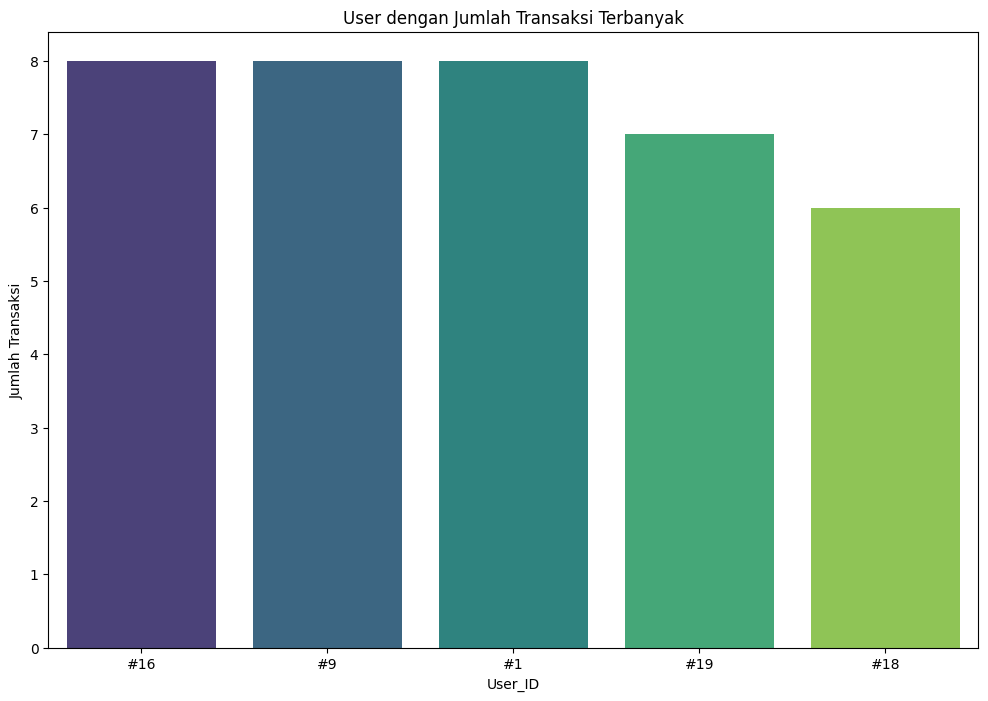

In [ ]:
# Visualisasi dengan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='User_ID', y='Jumlah_Transaksi', data=df_sorted.head(), palette='viridis')
plt.title('User dengan Jumlah Transaksi Terbanyak')
plt.xlabel('User_ID')
plt.ylabel('Jumlah Transaksi')
plt.xticks()
plt.show()

5 produk teratas

In [ ]:
# Menghitung jumlah setiap produk
produk_count = data_transaksi['Product_ID'].value_counts()
print(produk_count)

D    69
B    64
A    57
E    57
C    51
Name: Product_ID, dtype: int64


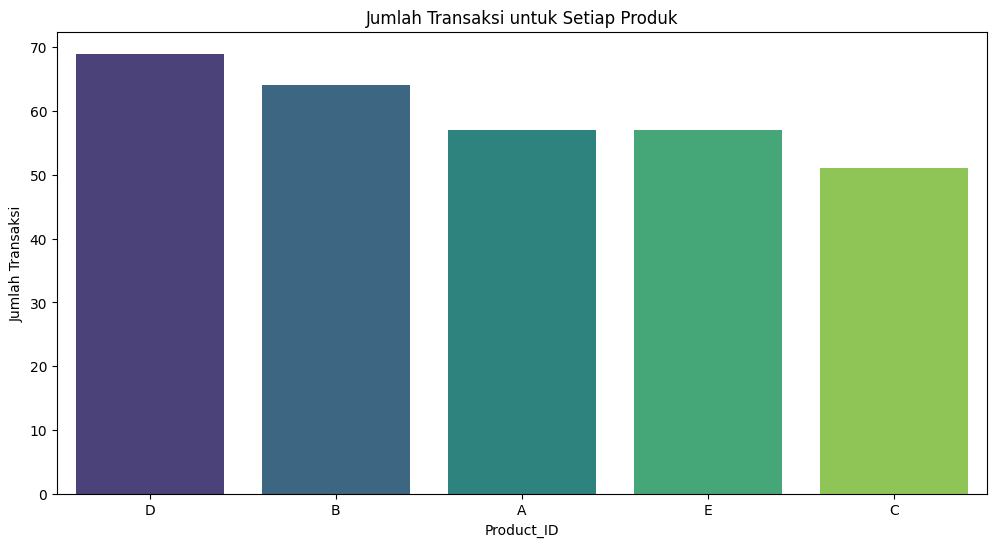

In [ ]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=produk_count.index, y=produk_count.values, palette="viridis")
plt.title('Jumlah Transaksi untuk Setiap Produk')
plt.xlabel('Product_ID')
plt.ylabel('Jumlah Transaksi')
plt.xticks()
plt.show()

In [ ]:
# Mencari status terbanyak berdasarkan Age
status_terbanyak = data_user.groupby('Age')['Status'].agg(lambda x: x.value_counts().index[0]).reset_index()
print(status_terbanyak)

   Age   Status
0   23    basic
1   25    basic
2   30  premium
3   32  premium
4   33    basic
5   36  premium
6   37  premium
7   38  premium
8   39  premium


hitung jumlah usesr berdasarkan status

In [ ]:
# Menghitung jumlah setiap status
status_count = data_user['Status'].value_counts()
print(status_count)

premium    16
basic       4
Name: Status, dtype: int64


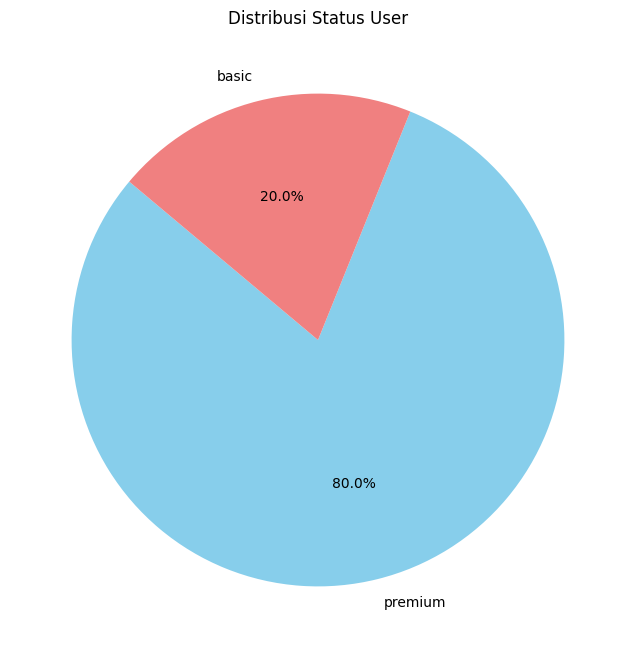

In [ ]:
# Visualisasi dengan pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Status User')
plt.show()

In [ ]:
# Mencari indeks dengan harga termahal
indeks_harga_termahal = data_produksi['HARGA_SATUAN'].idxmax()

# Mendapatkan informasi harga termahal, HARGA_SATUAN, dan Product_ID
harga_termahal = data_produksi.loc[indeks_harga_termahal, 'HARGA_SATUAN']
product_id_termahal = data_produksi.loc[indeks_harga_termahal, 'Product_ID']

# Menampilkan hasil
print(f"Harga termahal: {harga_termahal} untuk Product_ID: {product_id_termahal}")

Harga termahal: 15000 untuk Product_ID: D


a. Melakukan analisis jumlah transaksi

In [ ]:
total_transaksi = data_transaksi.shape[0]
print(f"Jumlah transaksi keseluruhan: {total_transaksi}")

Jumlah transaksi keseluruhan: 298


In [ ]:
#konversi kolom date ke 'datetime'
data_transaksi['Date'] = pd.to_datetime(data_transaksi['Date'])


#hitung transaksi tiap bulan
transaksi_tiap_bulan = data_transaksi.resample('M', on='Date').size()
print(f"Jumlah transasi tiap bulan: {transaksi_tiap_bulan}")

Jumlah transasi tiap bulan: Date
2023-01-31    86
2023-02-28    63
2023-03-31    75
2023-04-30    74
Freq: M, dtype: int64


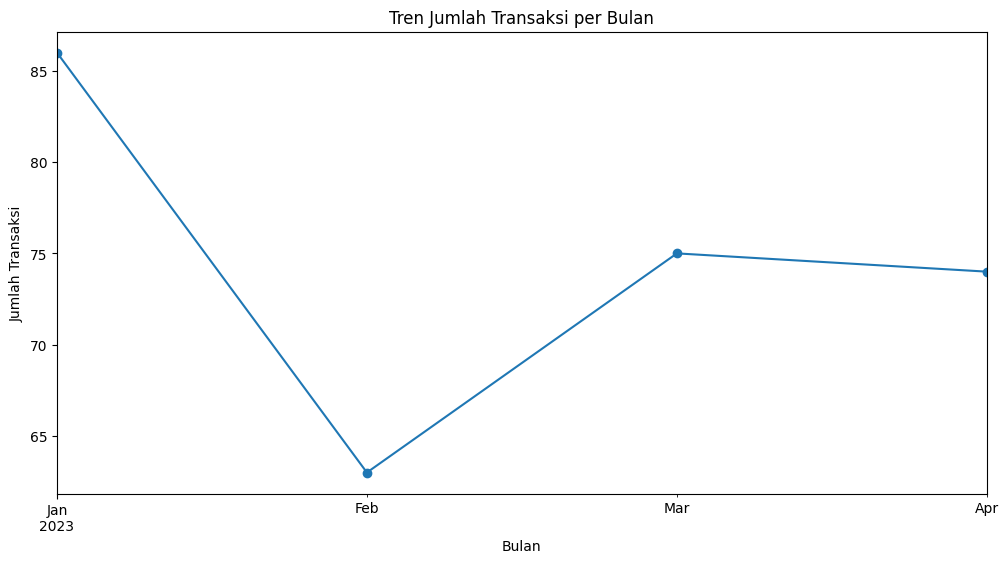

In [ ]:
#Visualisasi tren jumlah trans.
plt.figure(figsize=(12, 6))
transaksi_tiap_bulan.plot(marker='o')
plt.title('Tren Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.show()

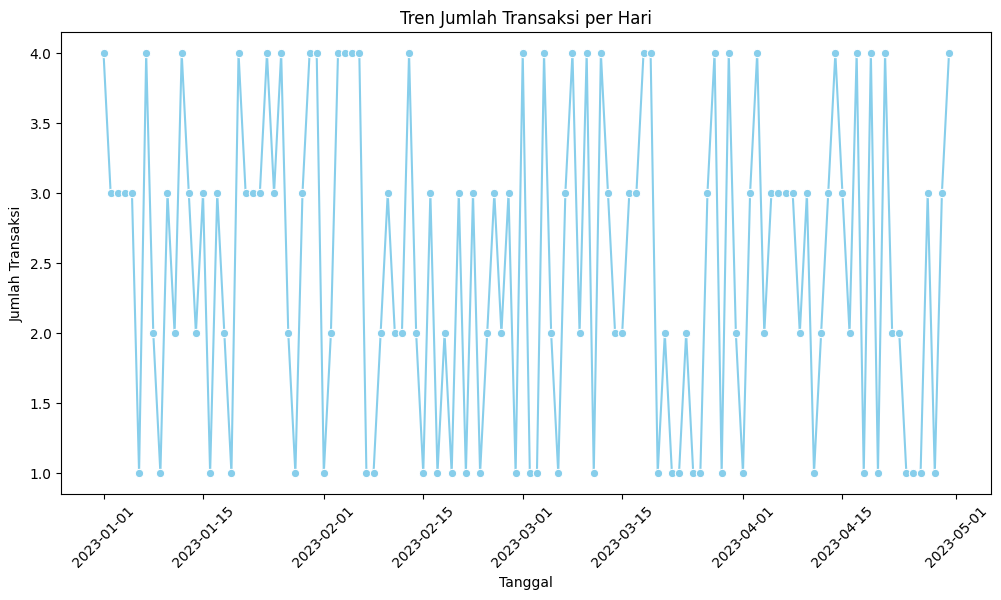

In [ ]:
# Menghitung jumlah transaksi per hari
transaksi_per_hari = data_transaksi.resample('D', on='Date').size().reset_index(name='Jumlah_Transaksi')

# Visualisasi jumlah transaksi per hari dengan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Jumlah_Transaksi', data=transaksi_per_hari, marker='o', color='skyblue')
plt.title('Tren Jumlah Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

Menghitung juml. produk yang terjual

In [ ]:
# Mengelompokkan berdasarkan 'Product_ID' dan menghitung jumlah produk terjual
jumlah_produk_terjual = data_transaksi.groupby('Product_ID')['Quantity'].sum().reset_index(name='Jumlah_Produk_Terjual')

# Menampilkan hasil
print(jumlah_produk_terjual)

  Product_ID  Jumlah_Produk_Terjual
0          A                  143.0
1          B                  154.0
2          C                  126.0
3          D                  166.0
4          E                  150.0


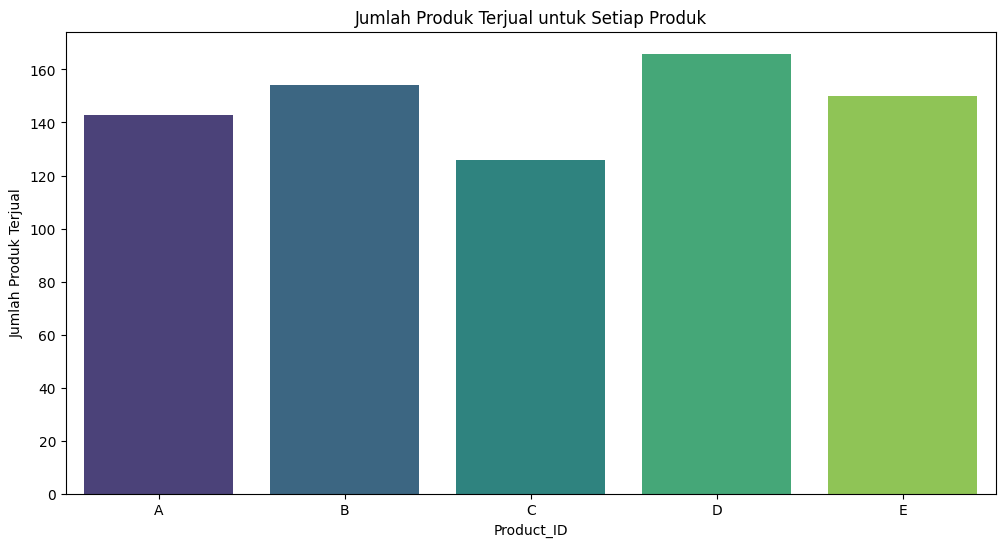

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_ID', y='Jumlah_Produk_Terjual', data=jumlah_produk_terjual, palette='viridis')
plt.title('Jumlah Produk Terjual untuk Setiap Produk')
plt.xlabel('Product_ID')
plt.ylabel('Jumlah Produk Terjual')
plt.xticks()
plt.show()

In [ ]:
# Sorting berdasarkan jumlah produk terjual
jumlah_produk_terjual = jumlah_produk_terjual.sort_values(by='Jumlah_Produk_Terjual', ascending=False)

# Menghitung produk terlaris (produk dengan jumlah penjualan tertinggi)
produk_terlaris = jumlah_produk_terjual.iloc[0]['Product_ID']
jumlah_terlaris = jumlah_produk_terjual.iloc[0]['Jumlah_Produk_Terjual']

# Menghitung produk dengan penjualan terendah (produk dengan jumlah penjualan terendah)
produk_terendah = jumlah_produk_terjual.iloc[-1]['Product_ID']
jumlah_terendah = jumlah_produk_terjual.iloc[-1]['Jumlah_Produk_Terjual']

# Menampilkan hasil
print(f"Produk Terlaris: {produk_terlaris} dengan jumlah penjualan {jumlah_terlaris}")
print(f"Produk Terendah: {produk_terendah} dengan jumlah penjualan {jumlah_terendah}")

Produk Terlaris: D dengan jumlah penjualan 166.0
Produk Terendah: C dengan jumlah penjualan 126.0


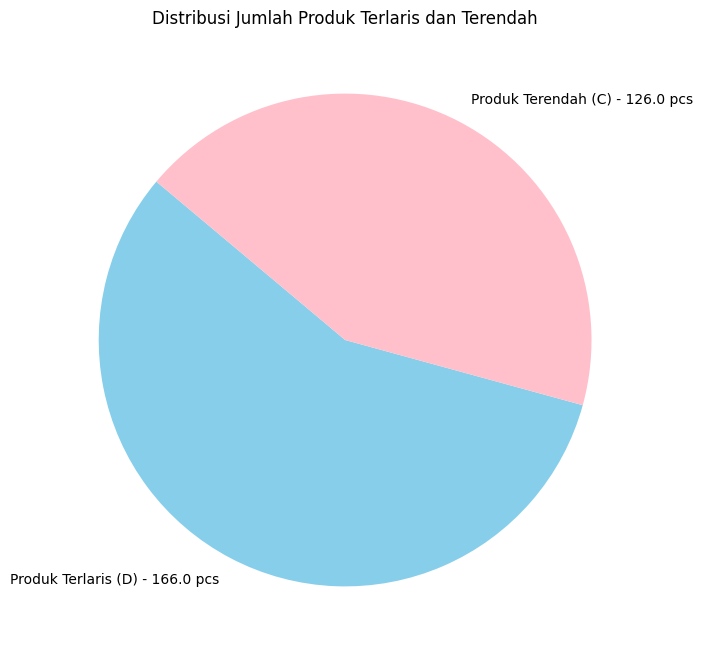

In [ ]:
data_pie = [jumlah_terlaris, jumlah_terendah]
data_pie = [jumlah_terlaris, jumlah_terendah]
labels = [f'Produk Terlaris ({produk_terlaris}) - {jumlah_terlaris} pcs',
          f'Produk Terendah ({produk_terendah}) - {jumlah_terendah} pcs']
# Visualisasi dengan diagram pie
plt.figure(figsize=(8, 8))
plt.pie(data_pie, labels=labels, autopct='', startangle=140, pctdistance=0.85, colors=['skyblue', 'pink'])
plt.title('Distribusi Jumlah Produk Terlaris dan Terendah')
plt.show()

melakukan indentifikasi rentang usia yang sering melkukan transaksi

In [ ]:
df_merged = pd.merge(data_transaksi, data_user, on='User_ID')

# Menghitung frekuensi setiap nilai umur
frekuensi_umur = df_merged['Age'].value_counts().sort_index()
print(f"Frekuensi setiap umur:\n{frekuensi_umur}")

Frekuensi setiap umur:
23    24
25    18
30    86
32    23
33     9
36    60
37    33
38    19
39    26
Name: Age, dtype: int64


In [ ]:
palet_warna = sns.color_palette("pastel", n_colors=len(frekuensi_umur))

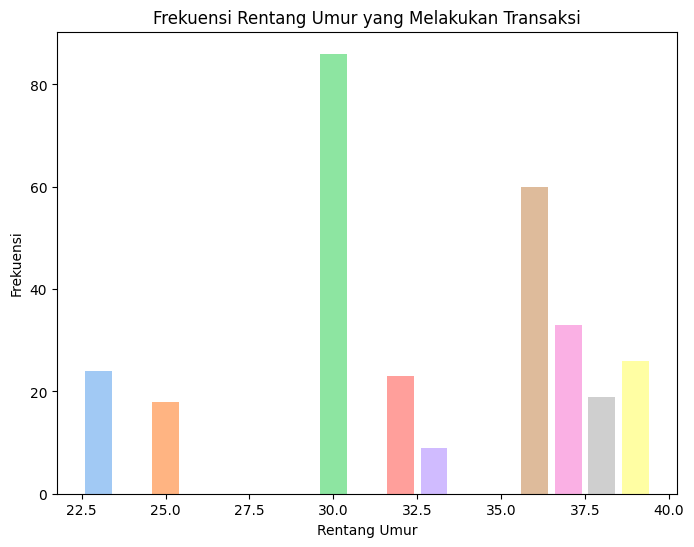

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(frekuensi_umur.index, frekuensi_umur.values, color=palet_warna)
plt.title('Frekuensi Rentang Umur yang Melakukan Transaksi')
plt.xlabel('Rentang Umur')
plt.ylabel('Frekuensi')
plt.show()

 membandingkan jumlah transaksi dan produk terjual antara pelanggan premium dan basic.


In [ ]:
# Menggabungkan DataFrame data_transaksi dengan data_user berdasarkan 'User_ID'
df_merged = pd.merge(data_transaksi, data_user, on='User_ID')

# Mengelompokkan data berdasarkan status berlangganan
grouped_status = df_merged.groupby('Status')

# Menghitung jumlah transaksi dan produk terjual
jumlah_transaksi_produk = grouped_status.agg({'Transaction_ID': 'count', 'Quantity': 'sum'})
print(f"Jumlah transaksi produk:\n{jumlah_transaksi_produk}")


Jumlah transaksi produk:
         Transaction_ID  Quantity
Status                           
basic                51     122.0
premium             247     617.0


<Figure size 1000x600 with 0 Axes>

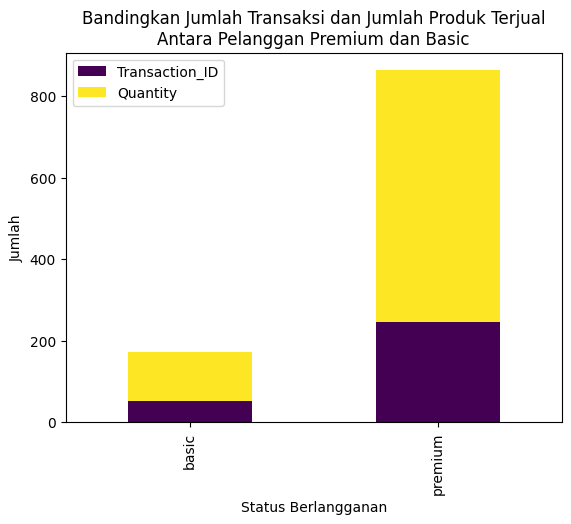

In [ ]:
plt.figure(figsize=(10, 6))
jumlah_transaksi_produk.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Bandingkan Jumlah Transaksi dan Jumlah Produk Terjual\nAntara Pelanggan Premium dan Basic')
plt.xlabel('Status Berlangganan')
plt.ylabel('Jumlah')
plt.show()

Melakukan indentifikasi untuk produk yang harus restok

In [ ]:
produk_perlu_restock = data_produksi[data_produksi['JUMLAH_DIGUDANG'] <= data_produksi['HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA']]

# Menampilkan hasil
print("Jumlah produk yang perlu di-restock:", len(produk_perlu_restock))
print(produk_perlu_restock[['Product_ID', 'JUMLAH_DIGUDANG', 'HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA']])

Jumlah produk yang perlu di-restock: 0
Empty DataFrame
Columns: [Product_ID, JUMLAH_DIGUDANG, HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA]
Index: []


In [ ]:
# Menghitung jumlah transaksi untuk masing-masing produk
jumlah_transaksi = data_transaksi.groupby('Product_ID')['Quantity'].sum().reset_index()

# Menampilkan hasil
print(jumlah_transaksi)

  Product_ID  Quantity
0          A     143.0
1          B     154.0
2          C     126.0
3          D     166.0
4          E     150.0


In [ ]:
df_merged = pd.merge(data_transaksi, data_produksi, on='Product_ID')

# menghitung pendapatan untuk setiap transaksi
df_merged['Pendapatan'] = df_merged['Quantity'] * df_merged['HARGA_SATUAN']

# mengelompokan data berdasarkan tanggal dan hitung total pendapatan untuk setiap tanggal
tren_pendapatan = df_merged.groupby('Date')['Pendapatan'].sum().reset_index()

print(df_merged[['Product_ID', 'Quantity', 'HARGA_SATUAN', 'Pendapatan']])



    Product_ID  Quantity  HARGA_SATUAN  Pendapatan
0            A       3.0          5000     15000.0
1            A       3.0          5000     15000.0
2            A       2.0          5000     10000.0
3            A       3.0          5000     15000.0
4            A       4.0          5000     20000.0
..         ...       ...           ...         ...
293          B       4.0          3500     14000.0
294          B       1.0          3500      3500.0
295          B       4.0          3500     14000.0
296          B       NaN          3500         NaN
297          B       4.0          3500     14000.0

[298 rows x 4 columns]


Tanggal dengan Transaksi Terbanyak: 2023-04-30 00:00:00
Jumlah Transaksi: 15.0
Tanggal dengan Transaksi Terendah: 2023-01-19 00:00:00
Jumlah Transaksi: 0.0


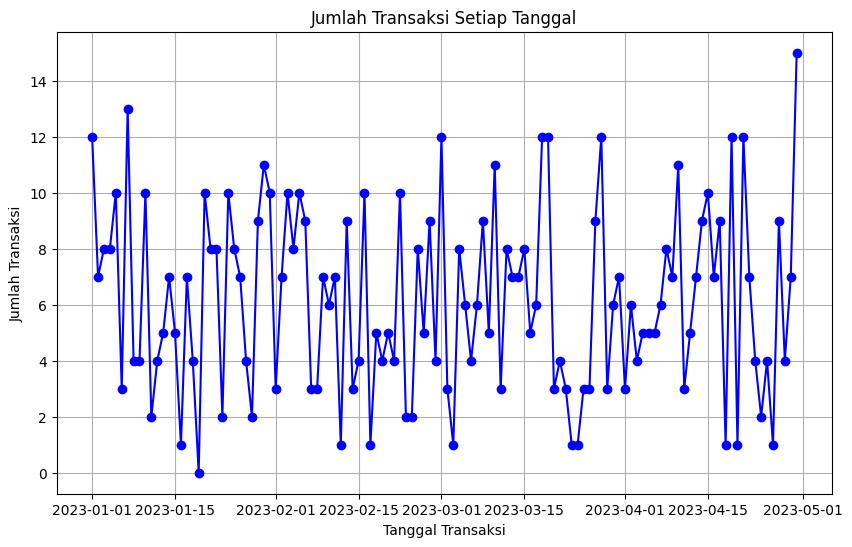

In [ ]:
transaksi_per_tanggal = data_transaksi.groupby('Date')['Quantity'].sum().reset_index()

# Temukan tanggal dengan transaksi terbanyak
tanggal_terbanyak = transaksi_per_tanggal.loc[transaksi_per_tanggal['Quantity'].idxmax()]
tanggal_terendah = transaksi_per_tanggal.loc[transaksi_per_tanggal['Quantity'].idxmin()]

# Menampilkan hasil
print("Tanggal dengan Transaksi Terbanyak:", tanggal_terbanyak['Date'])
print("Jumlah Transaksi:", tanggal_terbanyak['Quantity'])

print("Tanggal dengan Transaksi Terendah:", tanggal_terendah['Date'])
print("Jumlah Transaksi:", tanggal_terendah['Quantity'])


# Visualisasikan jumlah transaksi setiap tanggal
plt.figure(figsize=(10, 6))
plt.plot(transaksi_per_tanggal['Date'], transaksi_per_tanggal['Quantity'], marker='o', linestyle='-', color='blue')
plt.title('Jumlah Transaksi Setiap Tanggal')
plt.xlabel('Tanggal Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

# Tampilkan tanggal dengan transaksi terbanyak
# print("Tanggal dengan Transaksi Terbanyak:", tanggal_terbanyak, jumlah_transaksi )
# print("Tanggal dengan Transaksi Terendah:", tanggal_terendah, jumlah_transaksi )


Menghitung Total Pendapatan

In [ ]:
df_merged['Total_Pendapatan'] = df_merged['Quantity']* df_merged['HARGA_SATUAN']

total_pendapatan = df_merged['Total_Pendapatan'].sum()
print(f"Total pendapatan adalah:", total_pendapatan)

Total pendapatan adalah: 6681000.0


Menghitung rata-rata pendapatan tiap hari

In [ ]:
ratarata_pendapatan_per_transaksi = df_merged['Total_Pendapatan'].mean()

print(f"Rata-rata pendapatan per transaksi:", ratarata_pendapatan_per_transaksi)

Rata-rata pendapatan per transaksi: 24119.13357400722


Membuat perbandingan pendapatan bulan terbanyak dan tersedikit

In [ ]:
merged_data = pd.merge(data_transaksi, data_produksi, on='Product_ID', how='left')

In [ ]:
rata_pendapatan = data_produksi['HARGA_SATUAN'].mean()

In [ ]:
#hitung jumlh pendapatan per bualn
merged_data['Total_Pendapatan'] = merged_data['Quantity'] * merged_data.get('HARGA_SATUAN', rata_pendapatan)

In [ ]:
#mengelompokkan data
per_bulan = merged_data.groupby(merged_data['Date'].dt.to_period("M")).agg({'Total_Pendapatan': 'sum'}).reset_index()

In [ ]:
# Temukan tanggal dengan jumlah penjualan dan pendapatan terbanyak
pendapatan_terendah = per_bulan.loc[per_bulan['Total_Pendapatan'].idxmin()]
pendapatan_terbanyak = per_bulan.loc[per_bulan['Total_Pendapatan'].idxmax()]

In [ ]:
#lihat hasil
print(f"Pendapatan Terendah: ", pendapatan_terendah)
print(f"Pendapatan Terbanyak: ", pendapatan_terbanyak)

Pendapatan Terendah:  Date                  2023-02
Total_Pendapatan    1356500.0
Name: 1, dtype: object
Pendapatan Terbanyak:  Date                  2023-01
Total_Pendapatan    1893500.0
Name: 0, dtype: object


# MEMBUAT WORDCLOUD

In [ ]:
from wordcloud import WordCloud

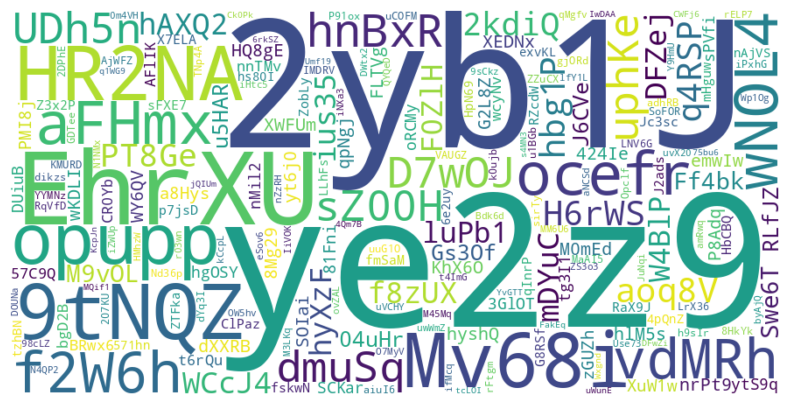

In [ ]:
transaksi_text = ' '.join(data_transaksi['Transaction_ID'].astype(str).values)
#membuat wordcloud
wordcloud = WordCloud(width=880, height=440, background_color='white').generate(transaksi_text)

#menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install gdown


In [ ]:
https://drive.google.com/file/d/1MSTEdEACaiVn8lapoNqPyV9VkKINdI9S/view?usp=sharing

In [ ]:
file_id = '1MSTEdEACaiVn8lapoNqPyV9VkKINdI9S'  # Ganti dengan ID file Google Drive Anda
output_file = 'requirements.txt'

!gdown --id $file_id -O $output_file

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MSTEdEACaiVn8lapoNqPyV9VkKINdI9S
To: /content/requirements.txt
100% 68.0/68.0 [00:00<00:00, 258kB/s]


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.4.2-cp310-cp310-linux_x86_64.whl size=10436

In [ ]:
import streamlit as st

In [ ]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
